In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df=pd.read_csv("titanic-passengers.csv",sep=';')

df.shape

#Applying Some preprocessing done before

cat_gender={'Sex':{'male':0,'female':1}} #maping gender to binary
surv_to_bin={'Survived':{'No':0,'Yes':1}} # maping survival to binary
df.replace(cat_gender,inplace=True)
df.replace(surv_to_bin,inplace=True)
one_hot=pd.get_dummies(df['Embarked'])
df=df.drop('Embarked',axis=1)
# df=df.drop('PassengerId',axis=1)

df=df.join(one_hot)
df.sort_values(['Cabin'])   #sorting passengers acc to Ca No.
df=df.drop('Cabin',axis=1) #seems to be useless as there's too much missing data
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  #creating a new column(title) instead of name
df = df.drop(columns='Name')
df['Age'].fillna(int(df['Age'].mean()), inplace=True) #replace missing age values with column's mean


#minimizeing titles numbers to only 5 
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4}) #same as we did with Sex &Embarked but in a different way

df["FamilySize"] = ""
df.FamilySize=df['SibSp']+df['Parch']
df=df.drop('Parch',axis=1)
df=df.drop('SibSp',axis=1)
df['Pclass']=df['Pclass'].astype('object')
df['Pclass']

df
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   C            891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
 10  Title        891 non-null    int64  
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
C              0
Q              0
S              0
Title          0
FamilySize     0
dtype: int64

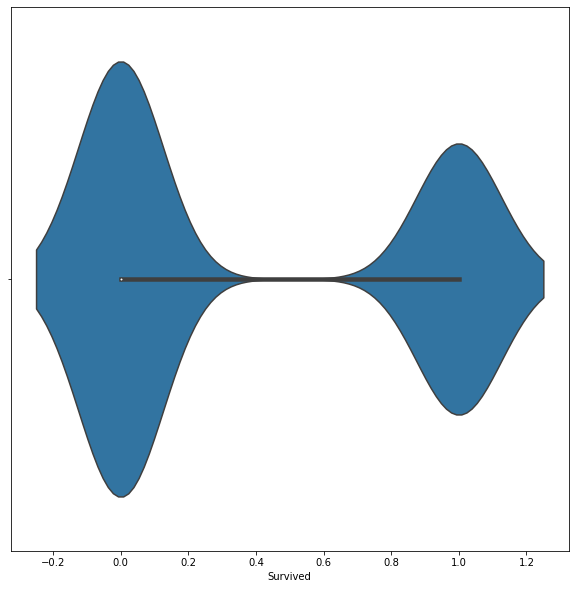

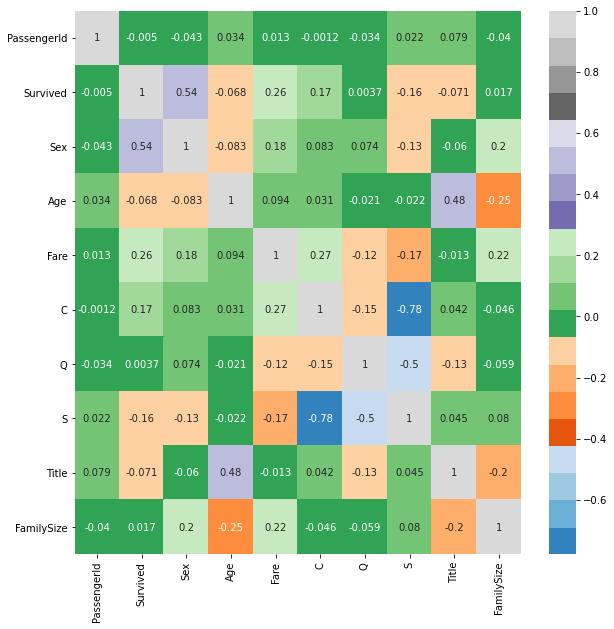

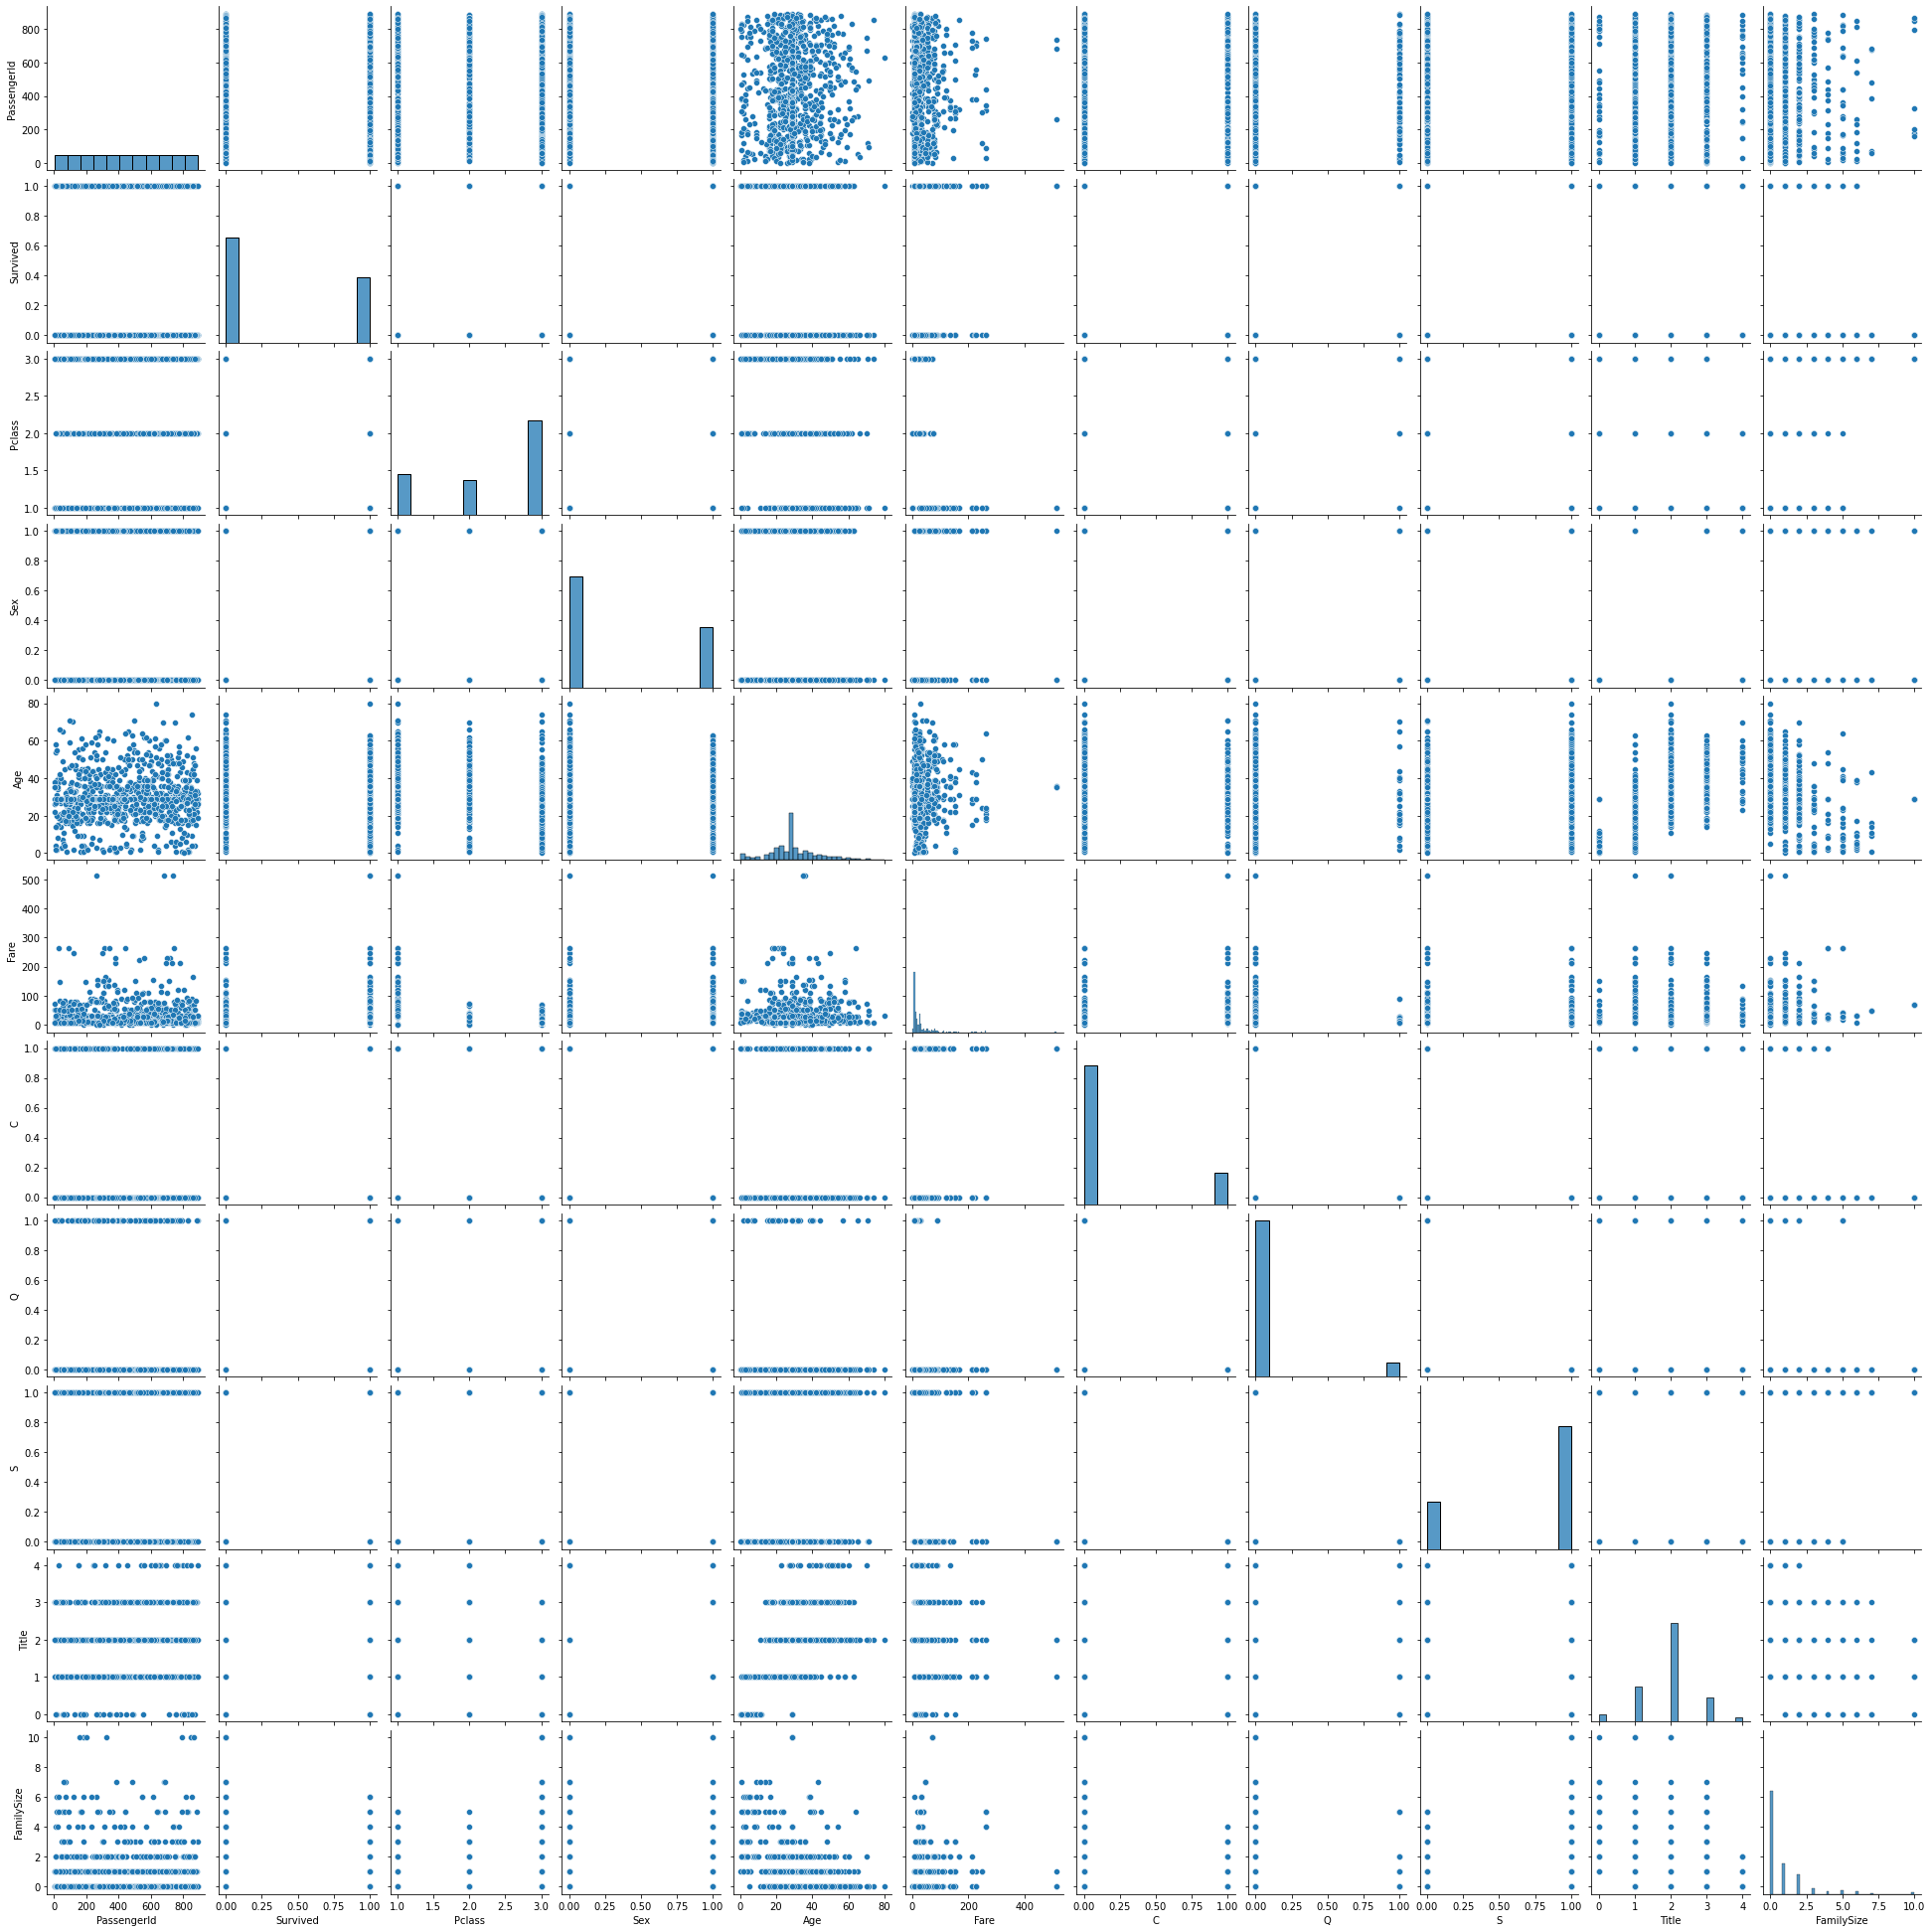

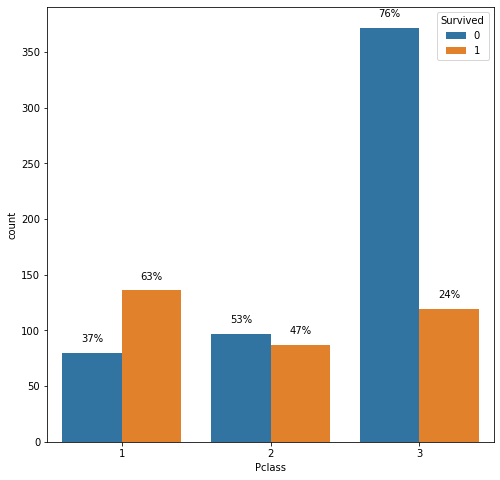

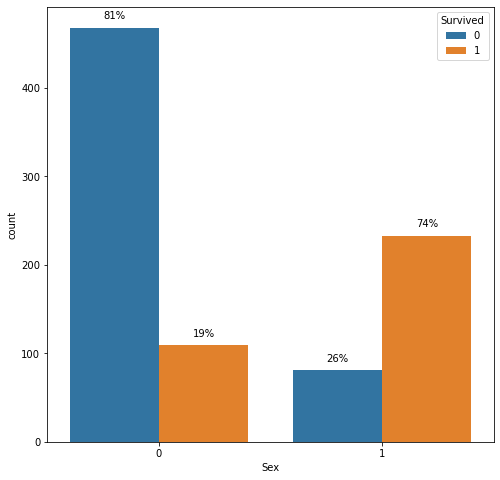

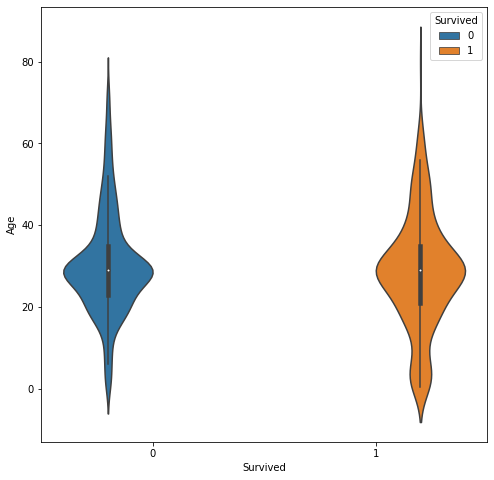

In [51]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Survived',data=df)
plt.show()

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True,cmap="tab20c")
plt.show()

sns.pairplot(df)
plt.show()

plt.figure(figsize=(8,8))
ax = sns.countplot(x='Pclass',data=df,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
    
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Sex',data=df,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
    
    
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Survived',hue='Survived',data=df)
plt.show()    

In [68]:
x = df[['Sex','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

print(classification_report(y_test,y_pred))


Accuracy=0.83
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[129,  15],
       [ 24,  55]], dtype=int64)